                Assignment No 14 - Decision Tree (Question No 1 : Company Data)
                
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.shape

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [6]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          3   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          3   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          3   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 11 columns]

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban_Yes, US_Yes]
Index: []

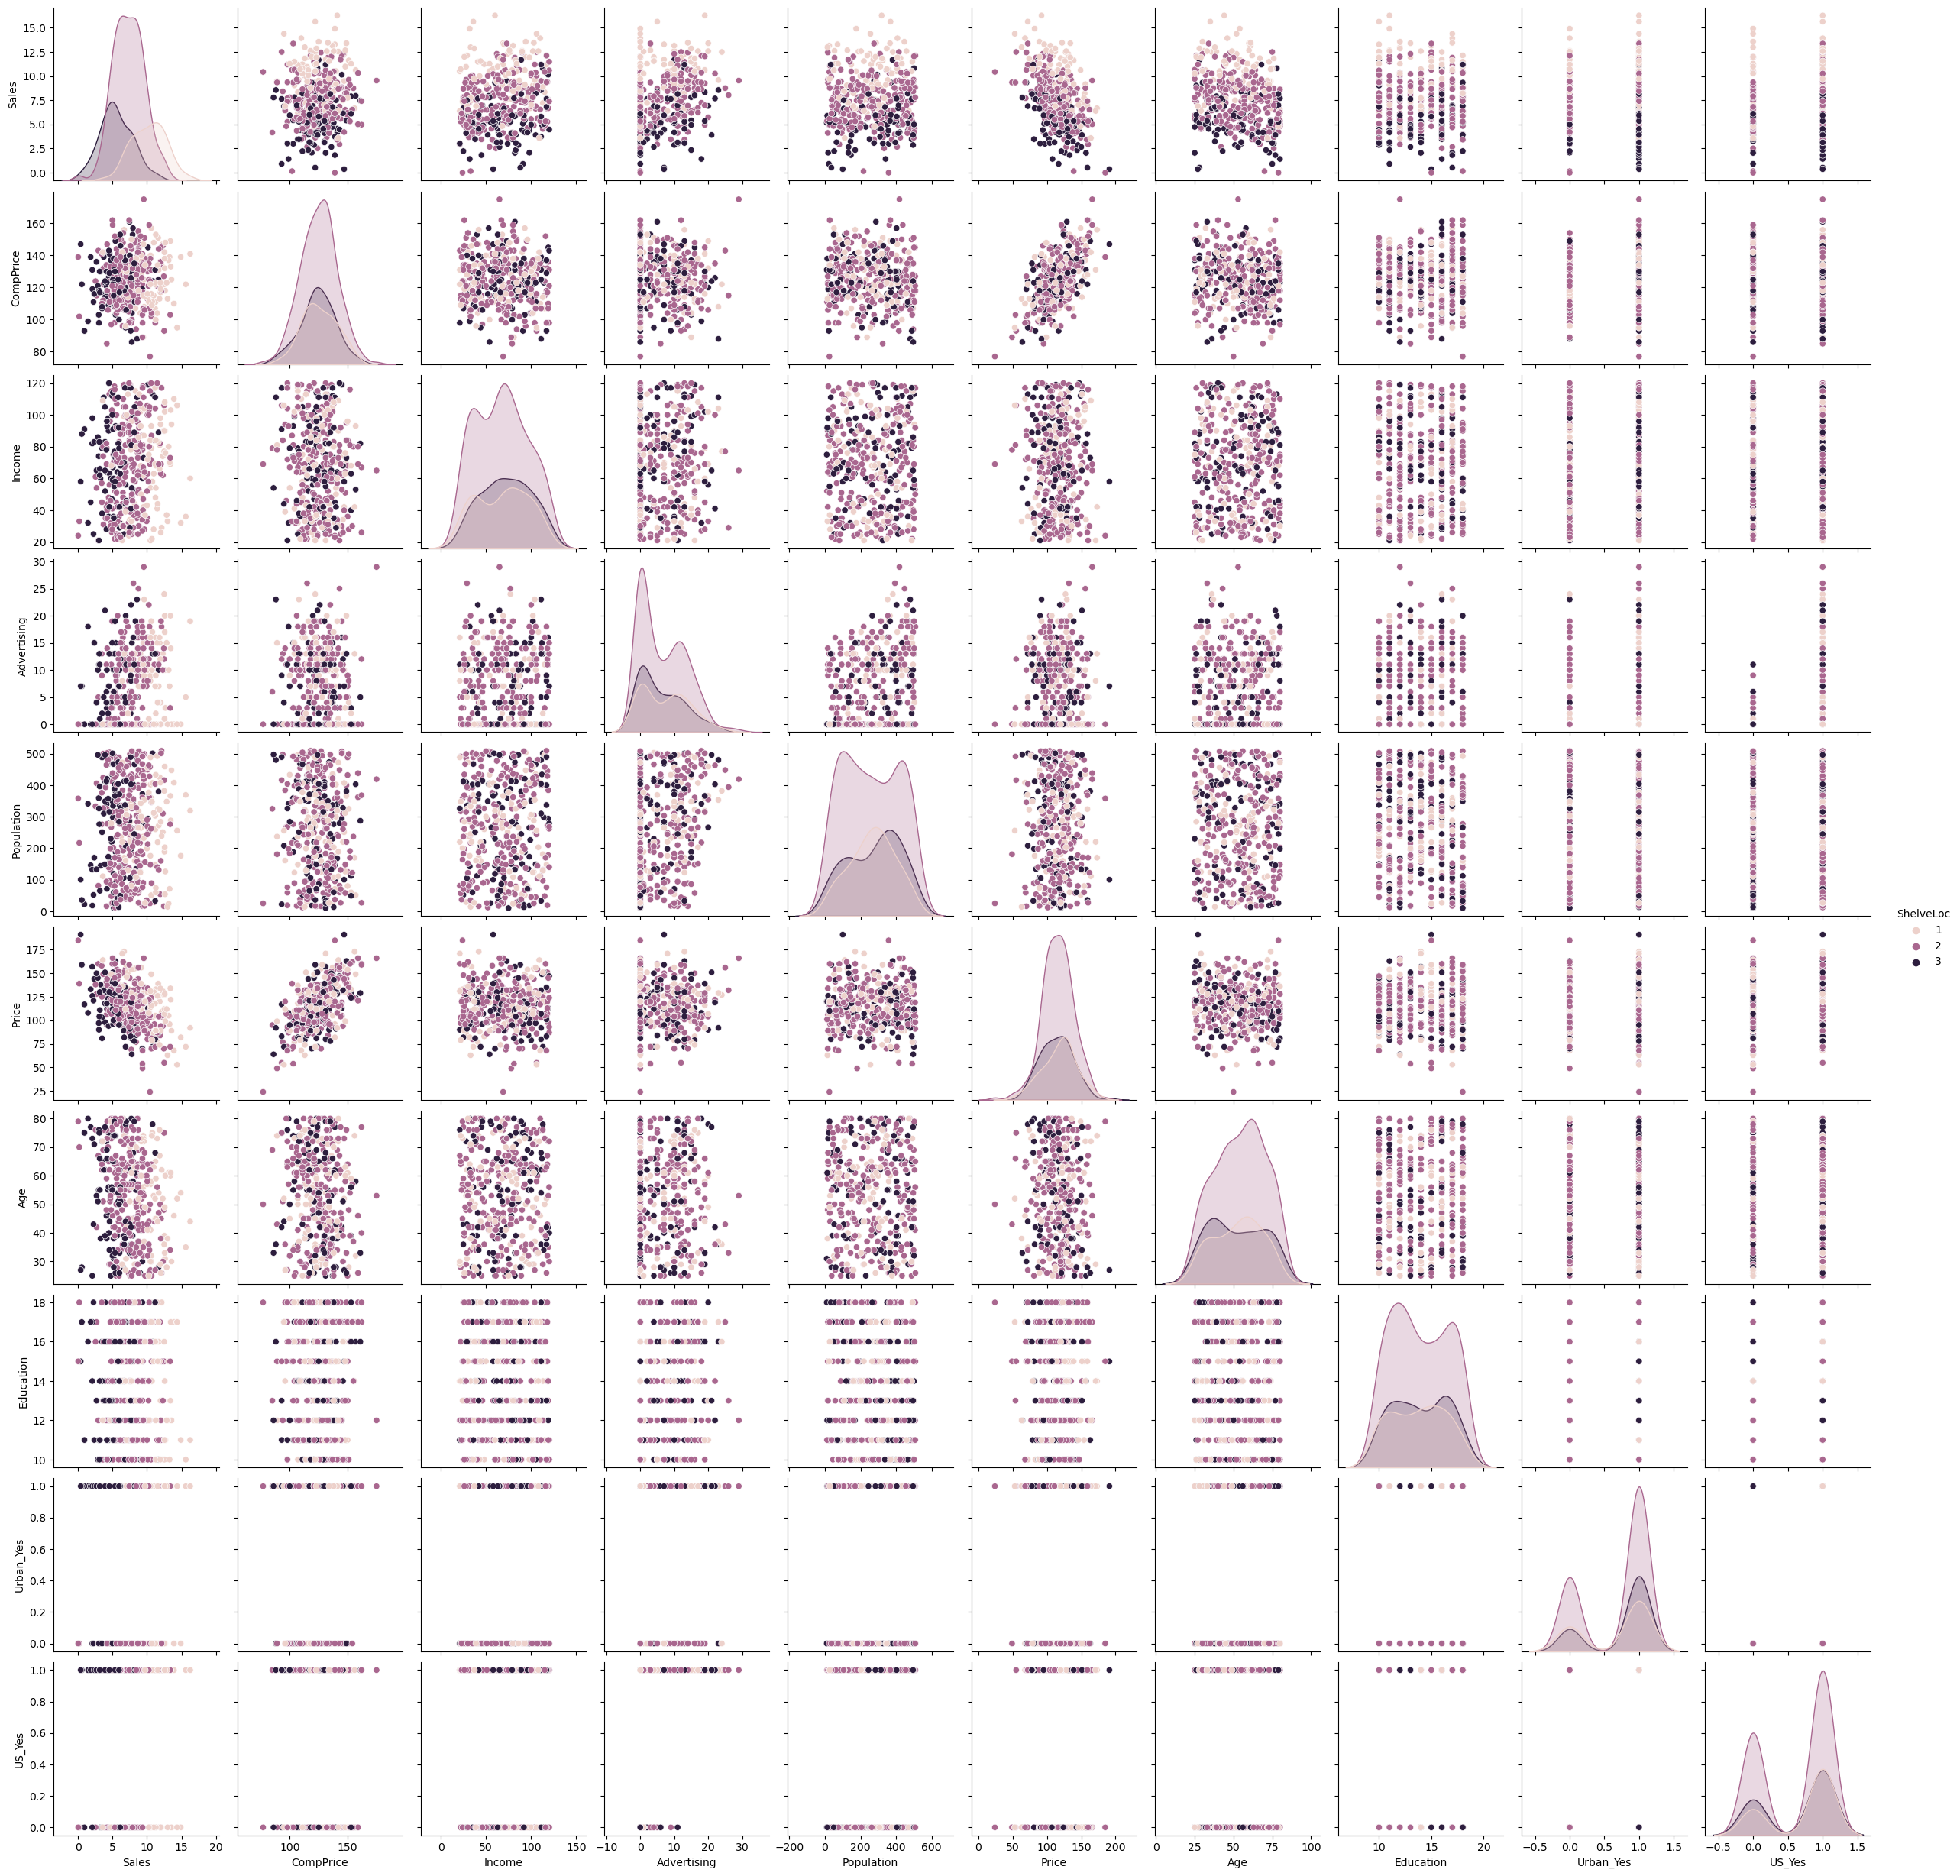

In [8]:
import seaborn as sns
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'ShelveLoc')

C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


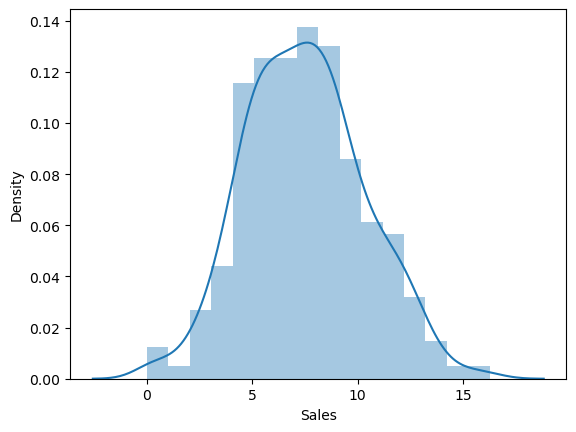

In [9]:
import seaborn as sns
sns.distplot(df['Sales'])
plt.show()

In [10]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [11]:
category = pd.cut(df.Sales, bins = [-0.1,5.39,7.49,9.32,16.27], labels = ['0.0-5.38 Sales',
                                                                       '5.39-7.48 Sales',
                                                                      '7.49-9.31 Sales',
                                                                      '9.32-Max Sales'])
df.insert(1,'Sales_Category', category)

In [12]:
df

Sales   Sales_Category  CompPrice  Income  Advertising  Population  \
0     9.50   9.32-Max Sales        138      73           11         276   
1    11.22   9.32-Max Sales        111      48           16         260   
2    10.06   9.32-Max Sales        113      35           10         269   
3     7.40  5.39-7.48 Sales        117     100            4         466   
4     4.15   0.0-5.38 Sales        141      64            3         340   
..     ...              ...        ...     ...          ...         ...   
395  12.57   9.32-Max Sales        138     108           17         203   
396   6.14  5.39-7.48 Sales        139      23            3          37   
397   7.41  5.39-7.48 Sales        162      26           12         368   
398   5.94  5.39-7.48 Sales        100      79            7         284   
399   9.71   9.32-Max Sales        134      37            0          27   

     Price  ShelveLoc  Age  Education  Urban_Yes  US_Yes  
0      120          3   42         17          1       1  
1       83          1   65         10          1       1  
2       80          2   59         12          1       1  
3       97          2   55         14          1       1  
4      128          3   38         13          1       0  
..     ...        ...  ...        ...        ...     ...  
395    128          1   33         14          1       1  
396    120          2   55         11          0       1  
397    159          2   40         18          1       1  
398     95          3   50         12          1       1  
399    120          1   49         16          1       1  

[400 rows x 12 columns]

In [13]:
df['Sales_Category'].value_counts()

5.39-7.48 Sales    101
0.0-5.38 Sales     100
7.49-9.31 Sales    100
9.32-Max Sales      99
Name: Sales_Category, dtype: int64

In [14]:
df[df['Sales_Category'].isnull() == True]

Empty DataFrame
Columns: [Sales, Sales_Category, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban_Yes, US_Yes]
Index: []

In [15]:
x = df.iloc[:,2:]
y = df['Sales_Category']

In [16]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          3   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          3   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          3   50   
399        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2           12          1       1  
3           14          1       1  
4           13          1       0  
..         ...        ...     ...  
395         14          1       1  
396         11          0       1  
397         18          1       1  
398         12          1       1  
399         16          1       1  

[400 rows x 10 columns]

In [17]:
y

0       9.32-Max Sales
1       9.32-Max Sales
2       9.32-Max Sales
3      5.39-7.48 Sales
4       0.0-5.38 Sales
            ...       
395     9.32-Max Sales
396    5.39-7.48 Sales
397    5.39-7.48 Sales
398    5.39-7.48 Sales
399     9.32-Max Sales
Name: Sales_Category, Length: 400, dtype: category
Categories (4, object): ['0.0-5.38 Sales' < '5.39-7.48 Sales' < '7.49-9.31 Sales' < '9.32-Max Sales']

In [18]:
#Splitting data into train & test part                  
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

           Building Decision Tree Classifier using Entropy Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

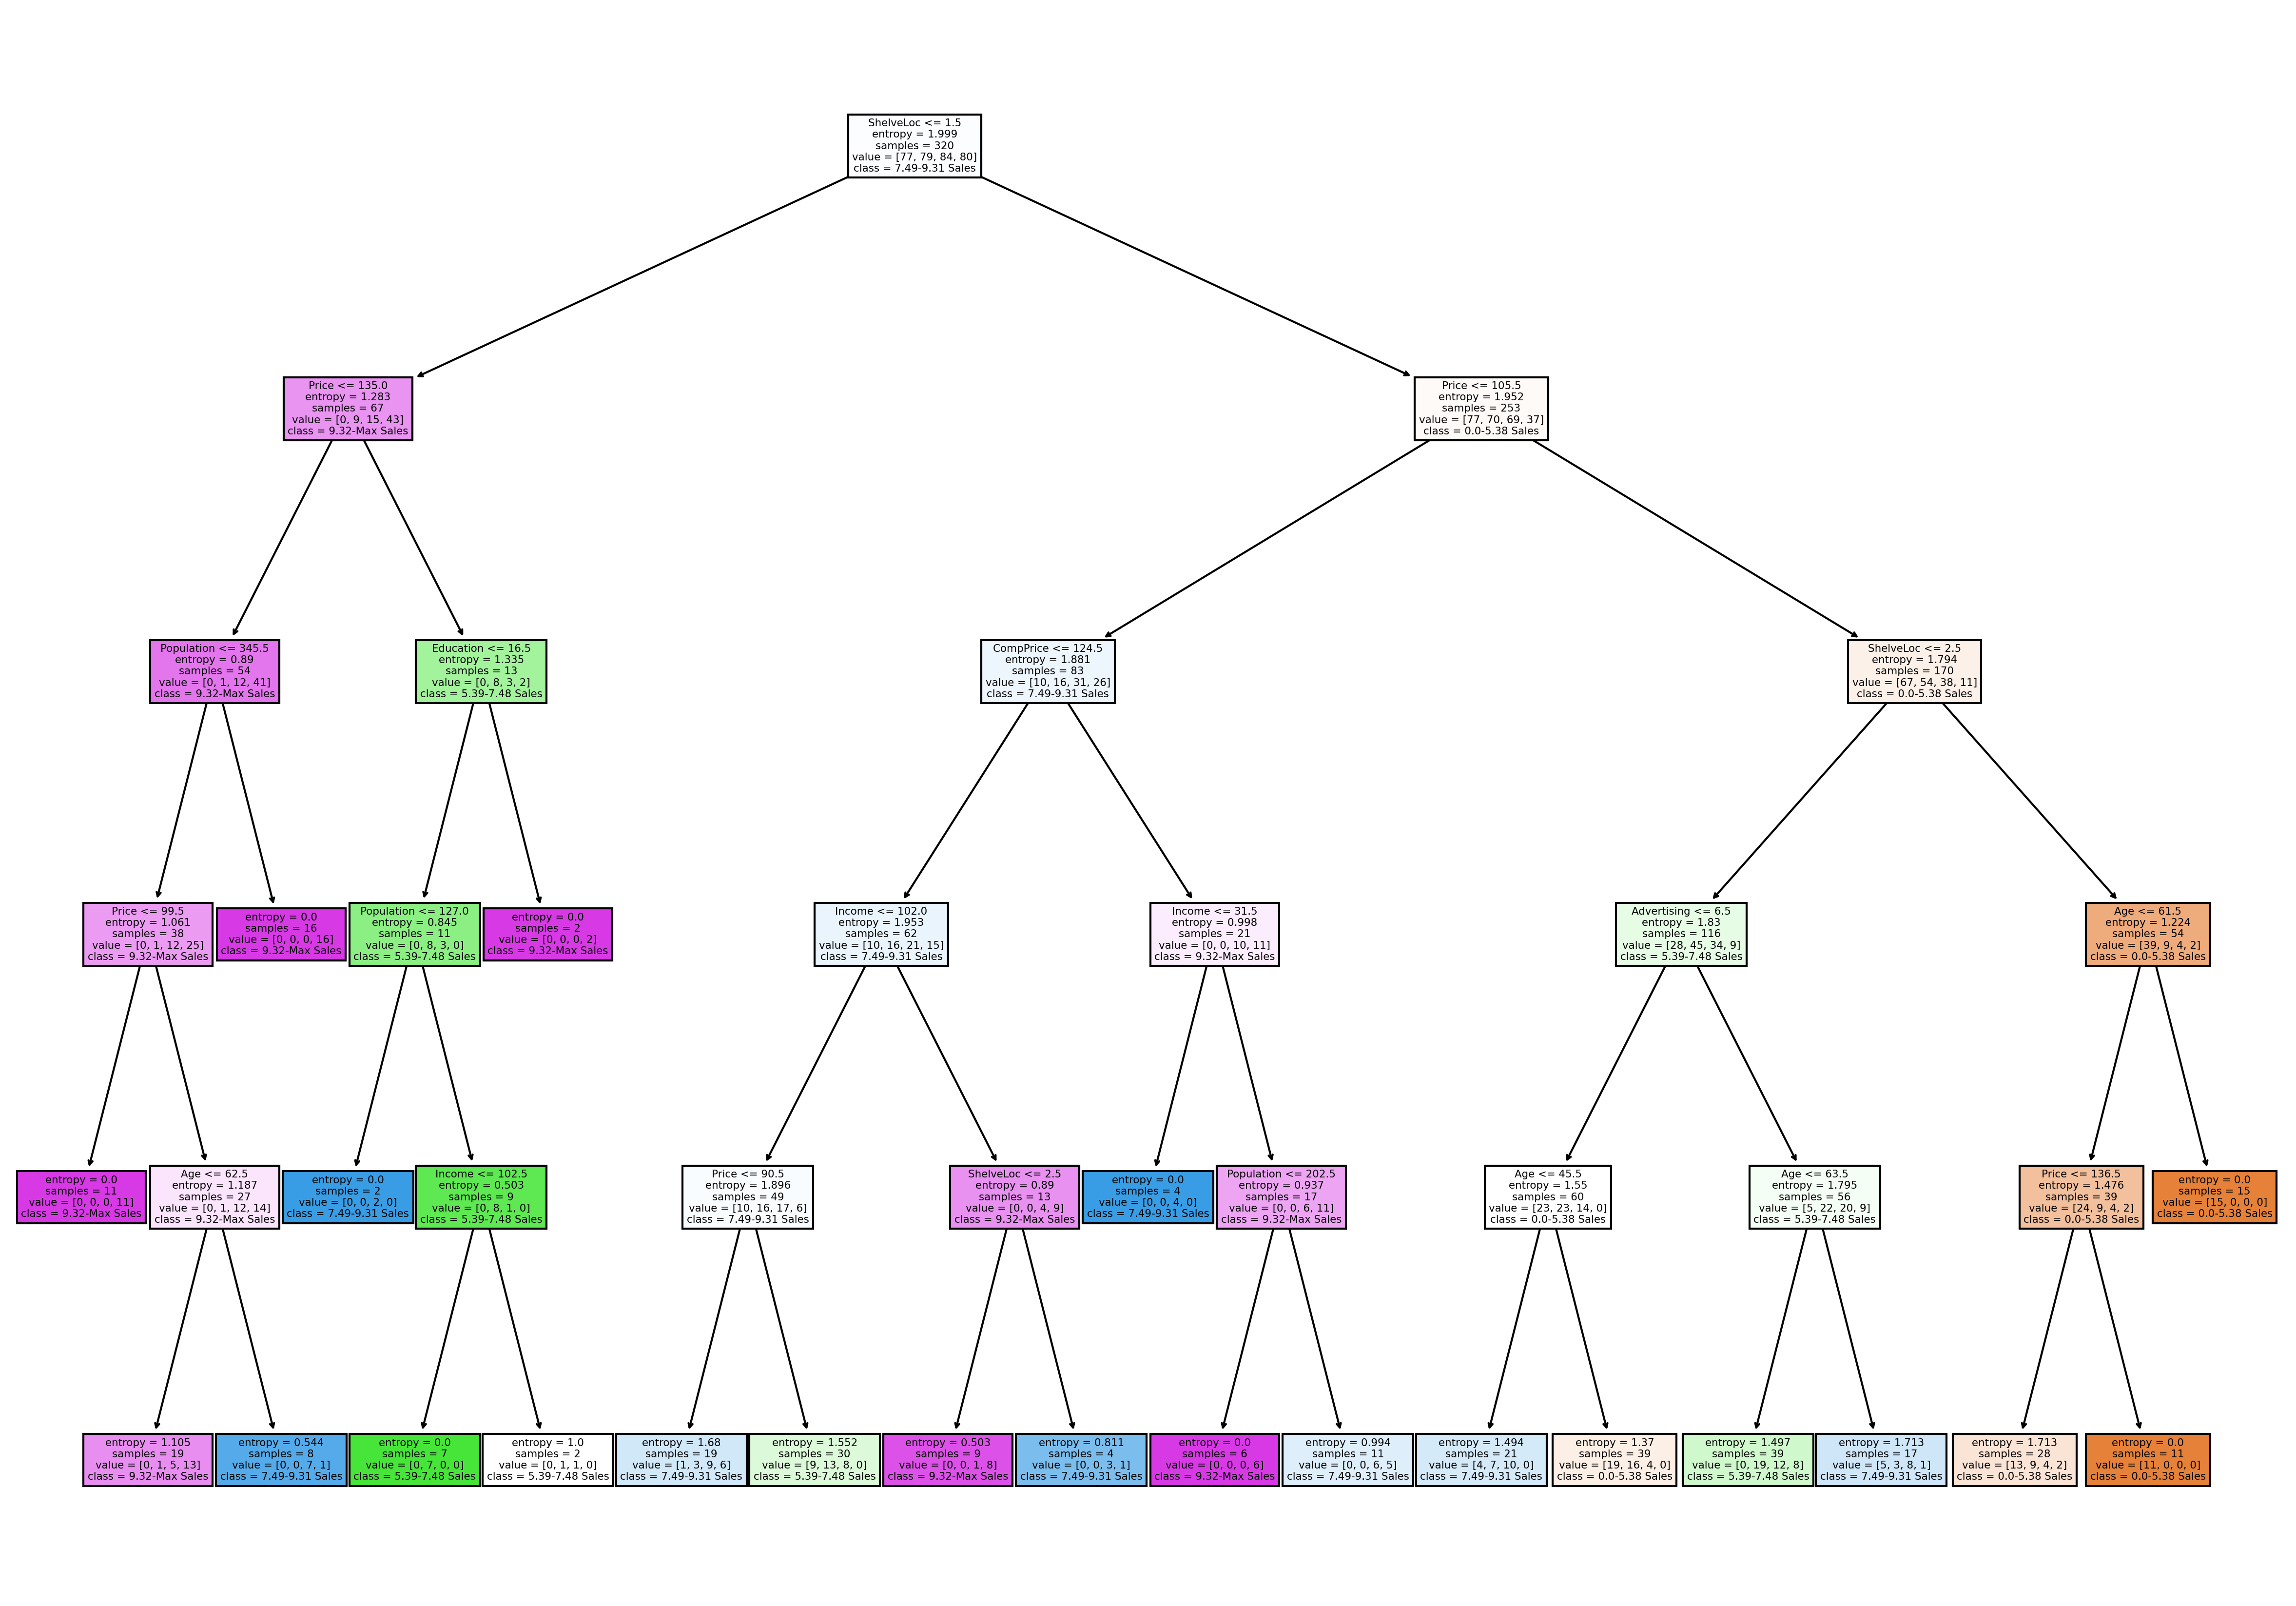

In [20]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc', 'Age',
   'Education','Urban_Yes','US_Yes']
sn=['0.0-5.38 Sales',
   '5.39-7.48 Sales',
   '7.49-9.31 Sales',
   '9.32-Max Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model,
               feature_names = fn, 
               class_names=sn,
               filled = True)
plt.show()

In [21]:
#Predictions on test set.
preds = model.predict(x_test)
preds

array(['5.39-7.48 Sales', '7.49-9.31 Sales', '5.39-7.48 Sales',
       '5.39-7.48 Sales', '5.39-7.48 Sales', '0.0-5.38 Sales',
       '9.32-Max Sales', '7.49-9.31 Sales', '0.0-5.38 Sales',
       '9.32-Max Sales', '5.39-7.48 Sales', '7.49-9.31 Sales',
       '7.49-9.31 Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '5.39-7.48 Sales', '5.39-7.48 Sales', '5.39-7.48 Sales',
       '0.0-5.38 Sales', '7.49-9.31 Sales', '7.49-9.31 Sales',
       '9.32-Max Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '5.39-7.48 Sales', '0.0-5.38 Sales', '9.32-Max Sales',
       '0.0-5.38 Sales', '9.32-Max Sales', '9.32-Max Sales',
       '9.32-Max Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '5.39-7.48 Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '5.39-7.48 Sales', '0.0-5.38 Sales', '5.39-7.48 Sales',
       '7.49-9.31 Sales', '5.39-7.48 Sales', '0.0-5.38 Sales',
       '0.0-5.38 Sales', '7.49-9.31 Sales', '5.39-7.48 Sales',
       '7.49-9.31 Sales', '7.49-9.31 Sales', '0.0-5.38 Sale

In [22]:
pd.Series(preds).value_counts()

7.49-9.31 Sales    23
5.39-7.48 Sales    20
0.0-5.38 Sales     20
9.32-Max Sales     17
dtype: int64

In [23]:
np.mean(preds == y_test)

0.475

In [24]:
#Find the accuracy
model.score(x_test,y_test)

0.475

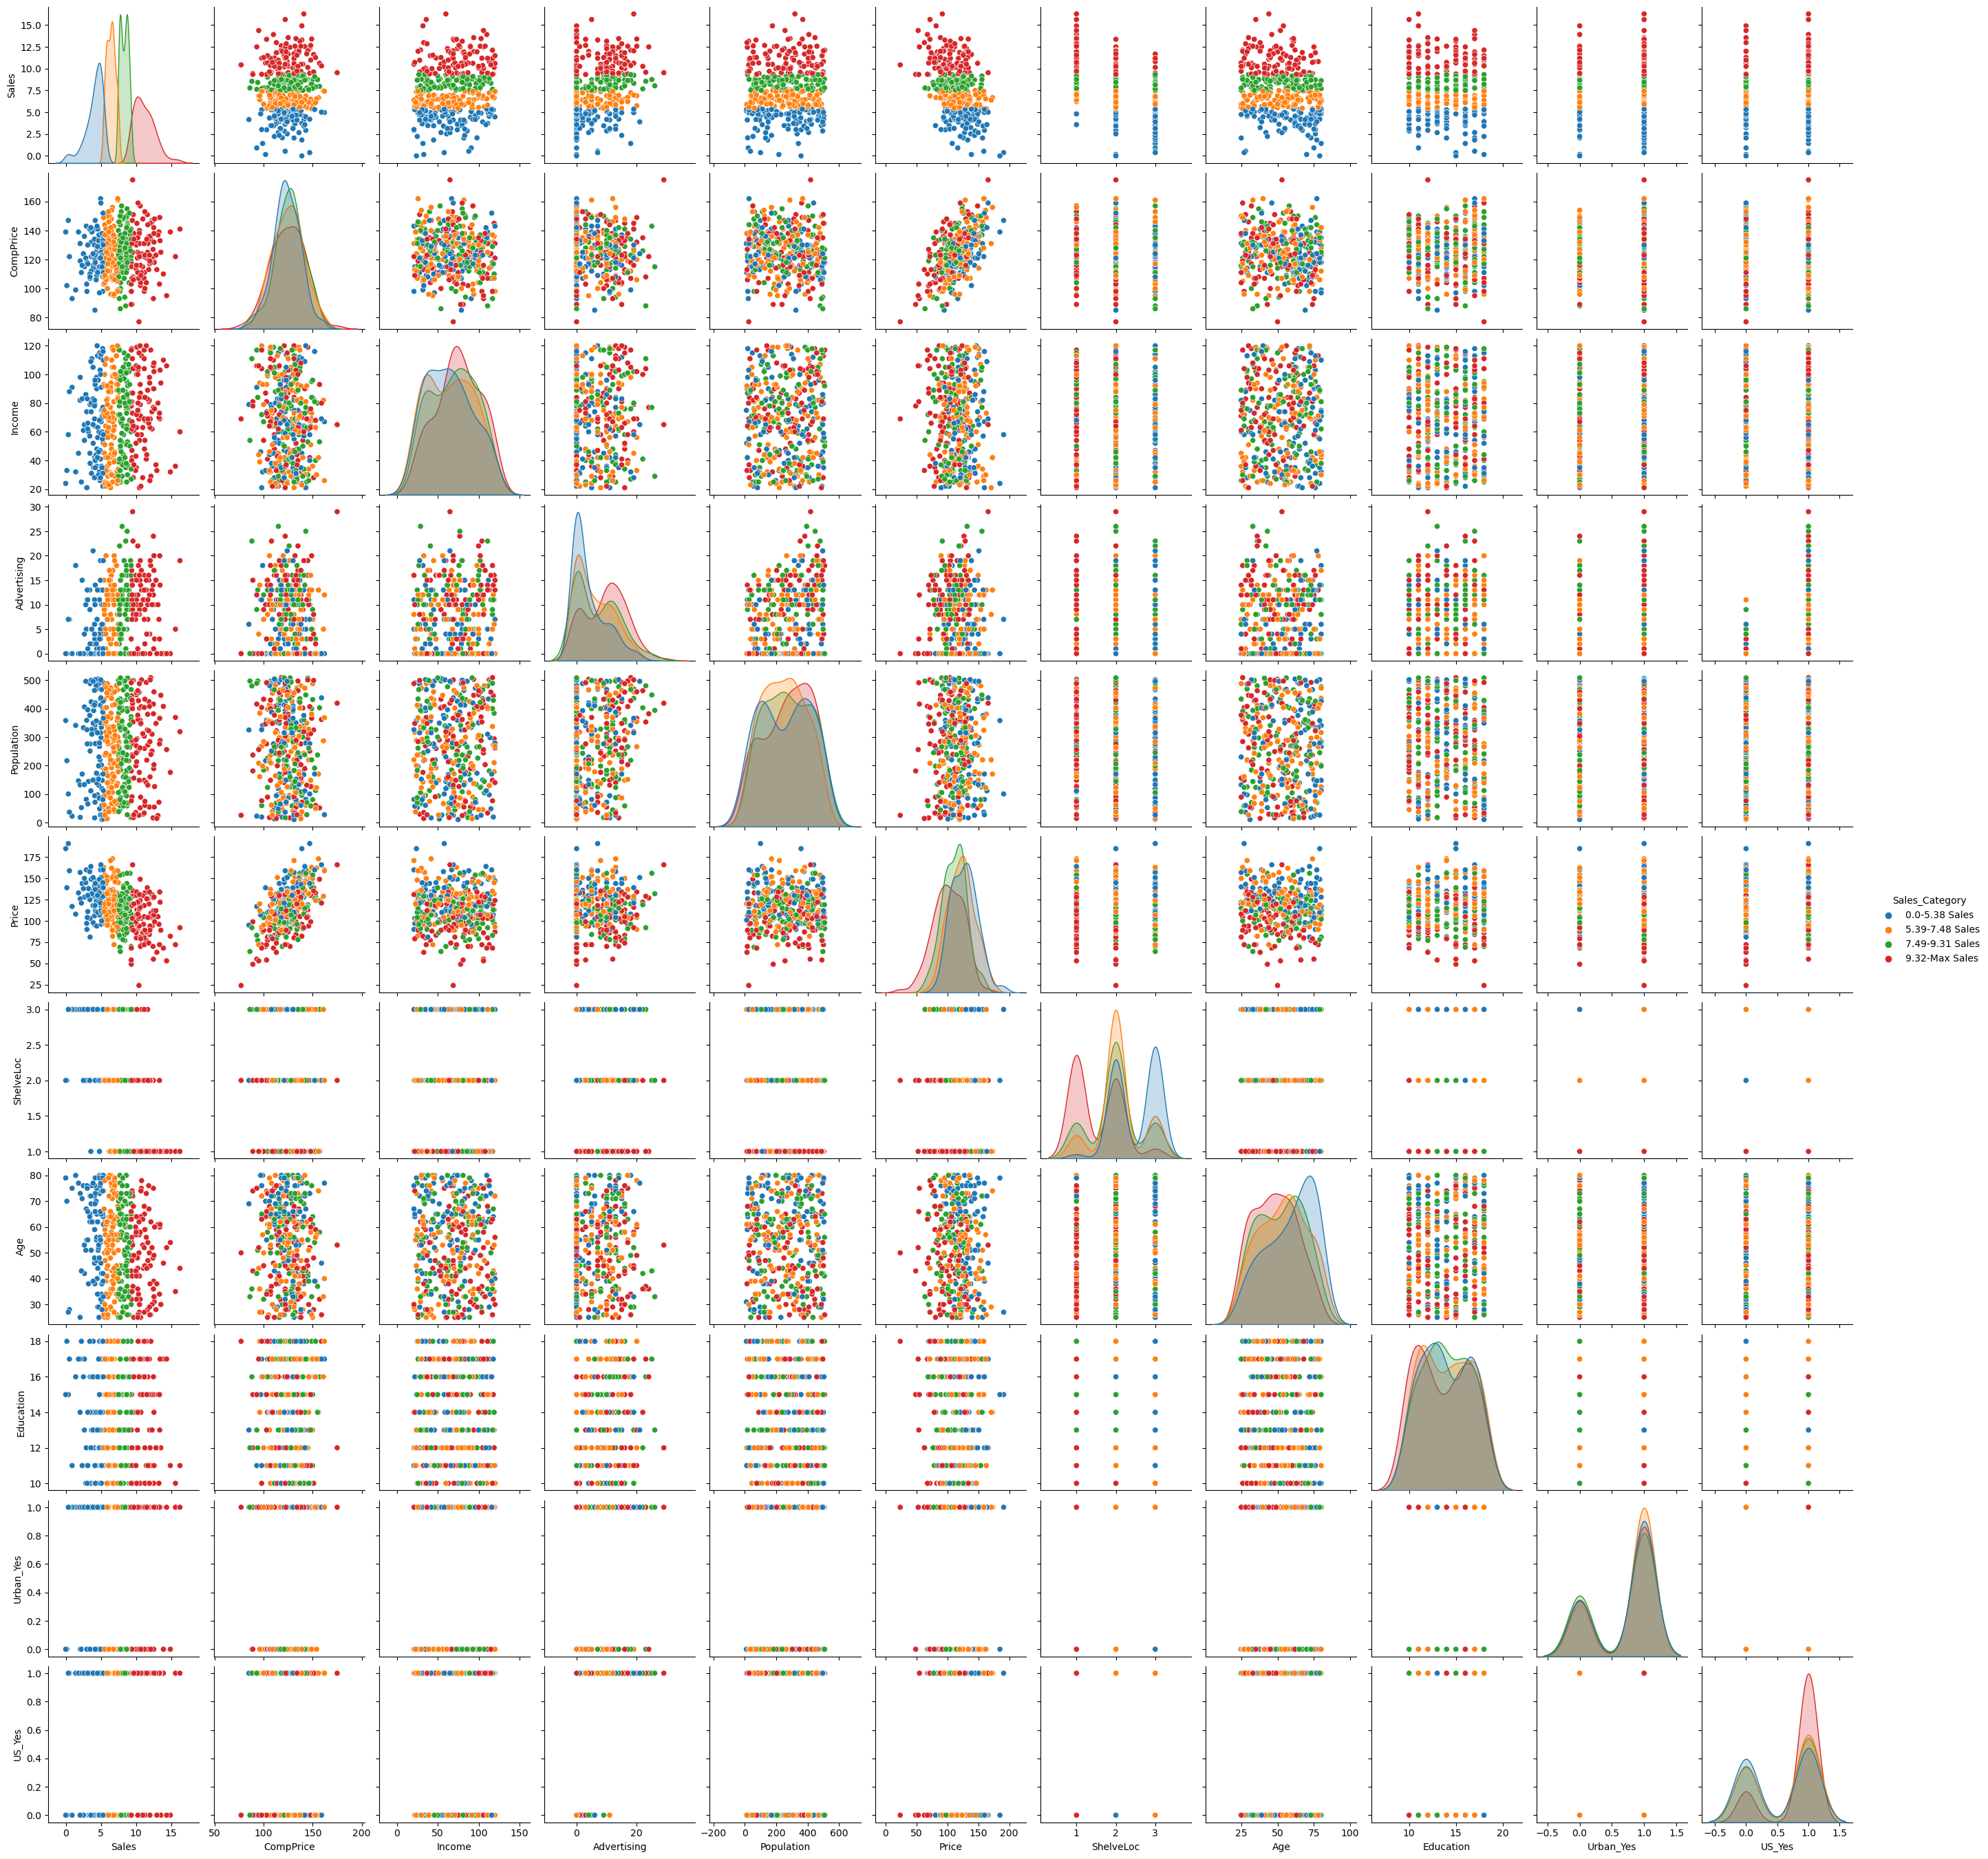

In [25]:
sns.pairplot(df, hue ='Sales_Category')
plt.show()

                        Decision tree Using Gini Index

In [26]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth =5)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

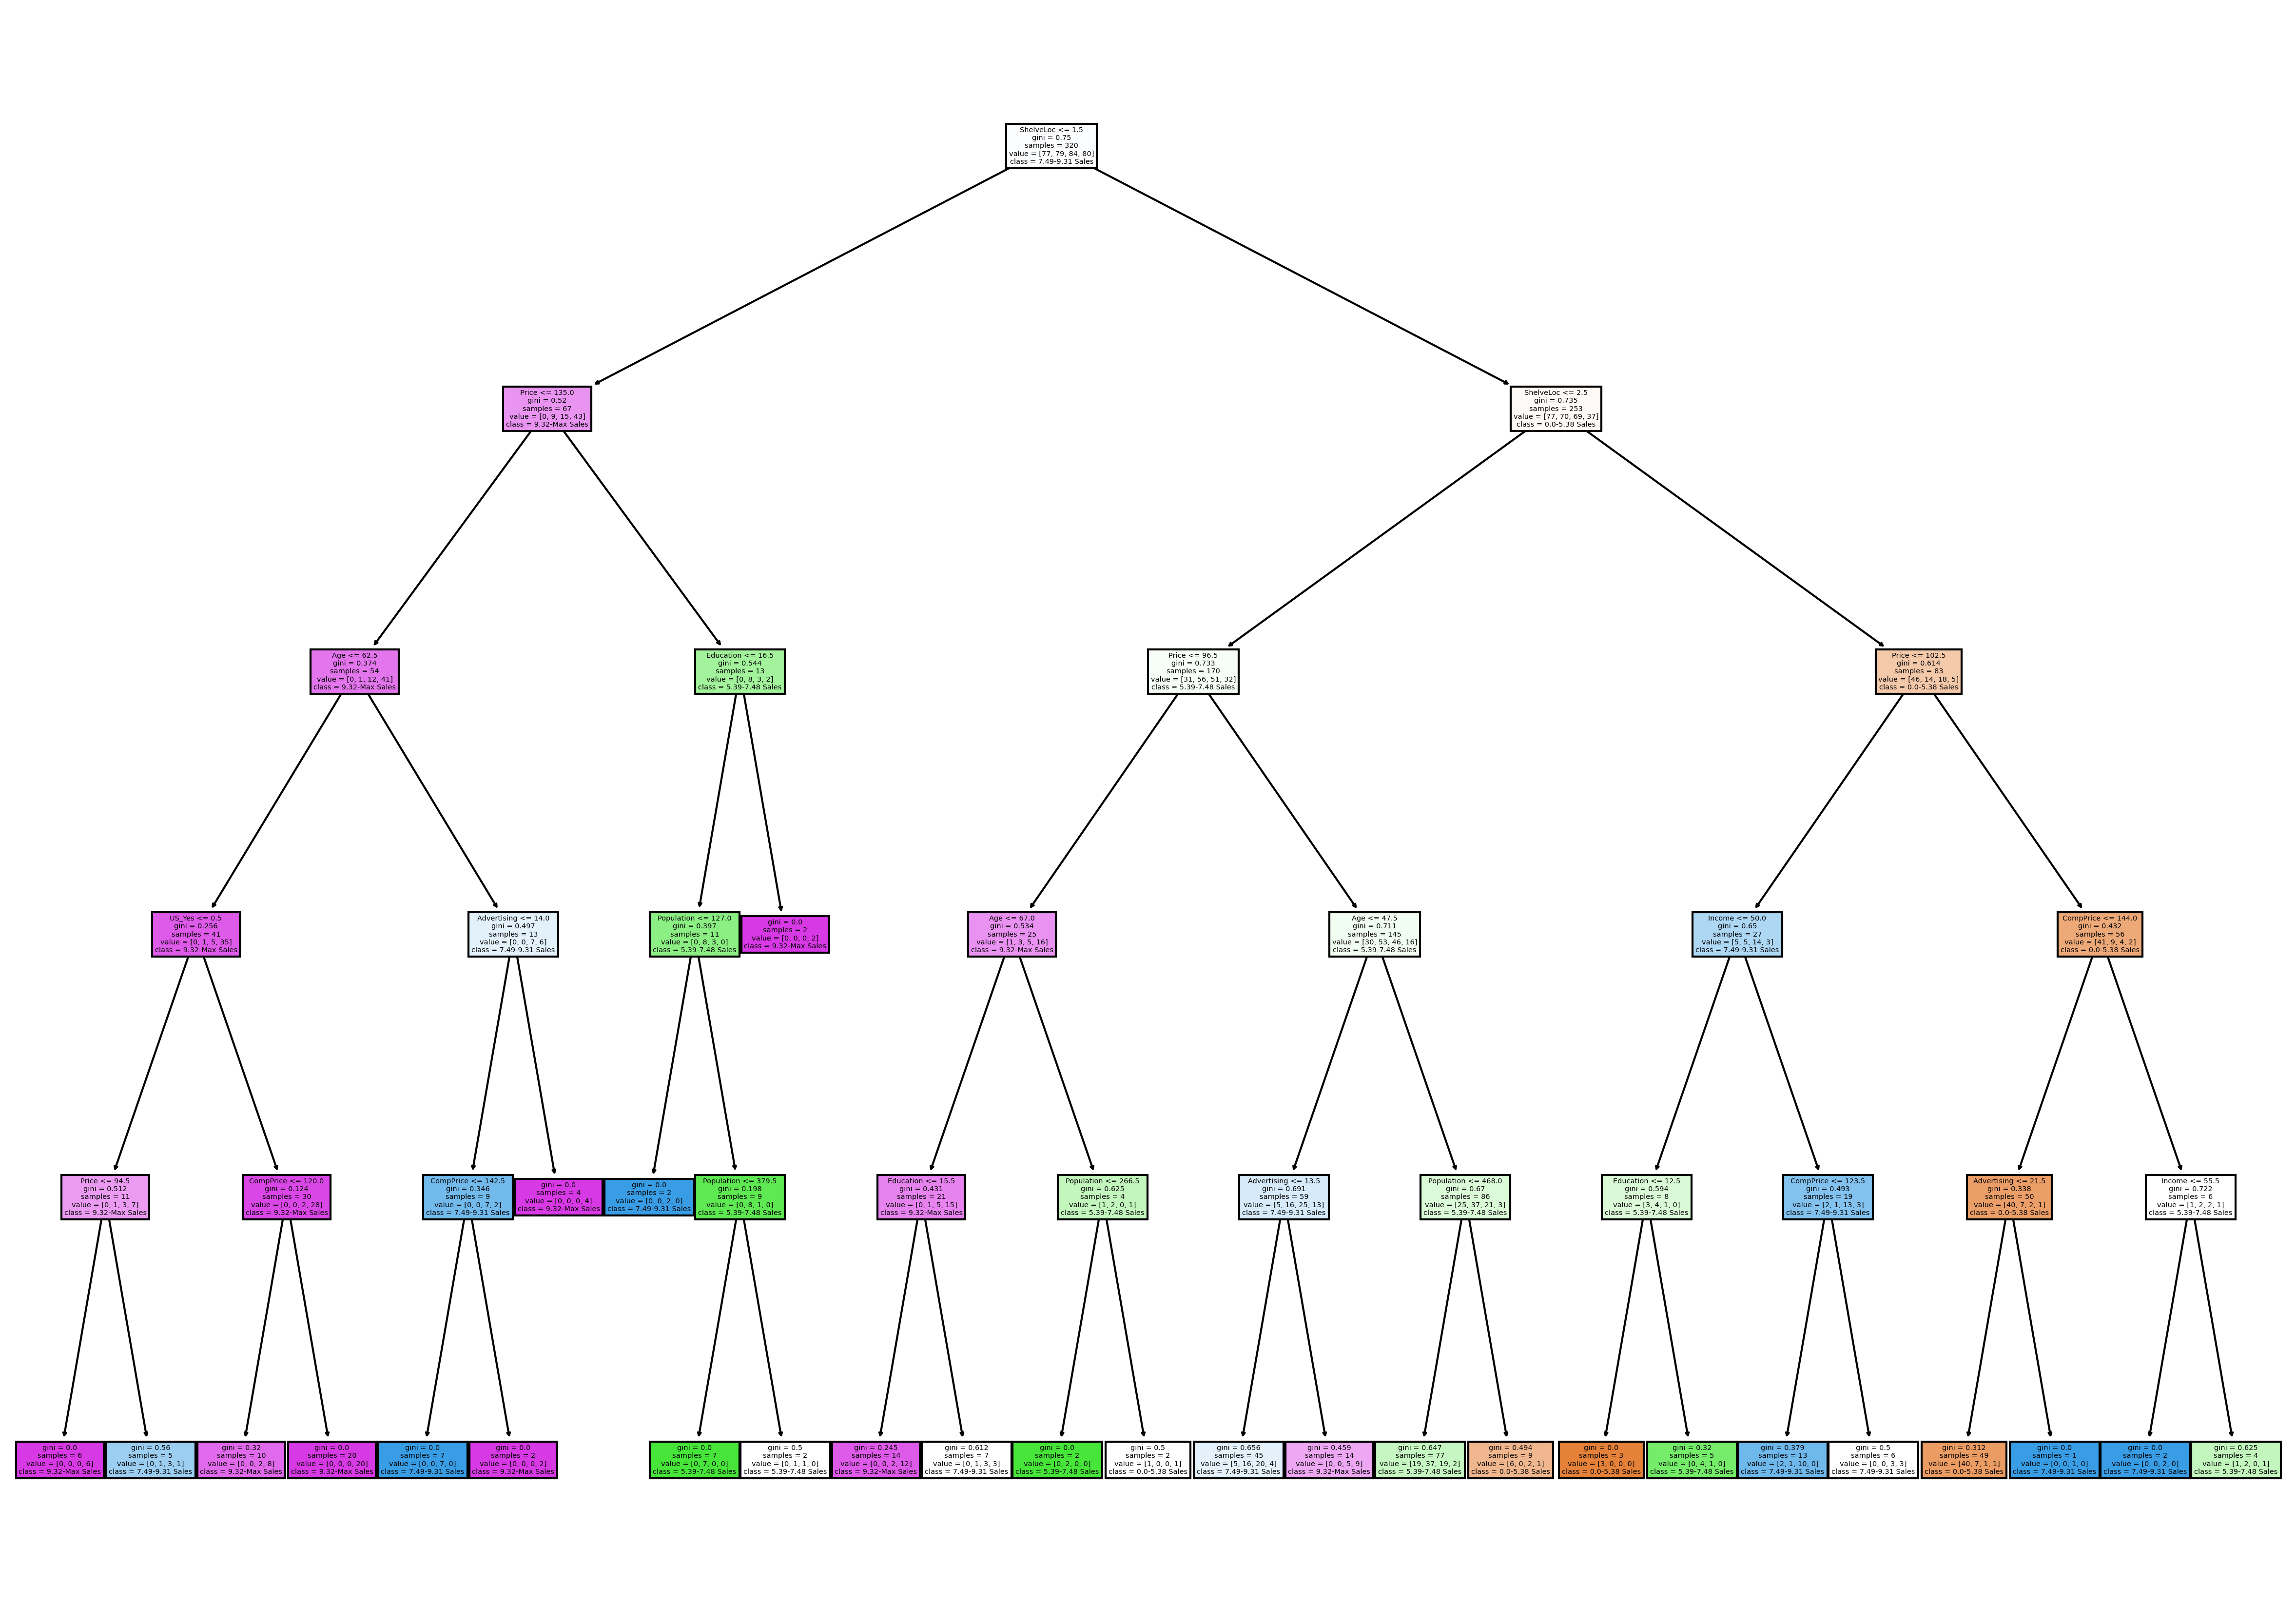

In [27]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc', 'Age',
   'Education','Urban_Yes','US_Yes']
sn=['0.0-5.38 Sales',
   '5.39-7.48 Sales',
   '7.49-9.31 Sales',
   '9.32-Max Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model_gini,
               feature_names = fn, 
               class_names=sn,
               filled = True)
plt.show()

In [28]:
pred_gini = model_gini.predict(x_test)
pred_gini

array(['5.39-7.48 Sales', '5.39-7.48 Sales', '5.39-7.48 Sales',
       '5.39-7.48 Sales', '5.39-7.48 Sales', '5.39-7.48 Sales',
       '9.32-Max Sales', '7.49-9.31 Sales', '5.39-7.48 Sales',
       '9.32-Max Sales', '5.39-7.48 Sales', '7.49-9.31 Sales',
       '5.39-7.48 Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '7.49-9.31 Sales', '9.32-Max Sales', '5.39-7.48 Sales',
       '5.39-7.48 Sales', '7.49-9.31 Sales', '5.39-7.48 Sales',
       '7.49-9.31 Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '5.39-7.48 Sales', '5.39-7.48 Sales', '9.32-Max Sales',
       '0.0-5.38 Sales', '9.32-Max Sales', '9.32-Max Sales',
       '9.32-Max Sales', '7.49-9.31 Sales', '9.32-Max Sales',
       '9.32-Max Sales', '7.49-9.31 Sales', '7.49-9.31 Sales',
       '5.39-7.48 Sales', '0.0-5.38 Sales', '7.49-9.31 Sales',
       '7.49-9.31 Sales', '5.39-7.48 Sales', '0.0-5.38 Sales',
       '5.39-7.48 Sales', '7.49-9.31 Sales', '5.39-7.48 Sales',
       '7.49-9.31 Sales', '7.49-9.31 Sales', '5.39-7.4

In [29]:
#Find the accuracy
model_gini.score(x_test,y_test)

0.35

In [30]:
np.mean(pred_gini == y_test)

0.35

In [ ]:
                  DECISION  TREE FOR REGRESSION ANALYSIS.

In [31]:
df

Sales   Sales_Category  CompPrice  Income  Advertising  Population  \
0     9.50   9.32-Max Sales        138      73           11         276   
1    11.22   9.32-Max Sales        111      48           16         260   
2    10.06   9.32-Max Sales        113      35           10         269   
3     7.40  5.39-7.48 Sales        117     100            4         466   
4     4.15   0.0-5.38 Sales        141      64            3         340   
..     ...              ...        ...     ...          ...         ...   
395  12.57   9.32-Max Sales        138     108           17         203   
396   6.14  5.39-7.48 Sales        139      23            3          37   
397   7.41  5.39-7.48 Sales        162      26           12         368   
398   5.94  5.39-7.48 Sales        100      79            7         284   
399   9.71   9.32-Max Sales        134      37            0          27   

     Price  ShelveLoc  Age  Education  Urban_Yes  US_Yes  
0      120          3   42         17          1       1  
1       83          1   65         10          1       1  
2       80          2   59         12          1       1  
3       97          2   55         14          1       1  
4      128          3   38         13          1       0  
..     ...        ...  ...        ...        ...     ...  
395    128          1   33         14          1       1  
396    120          2   55         11          0       1  
397    159          2   40         18          1       1  
398     95          3   50         12          1       1  
399    120          1   49         16          1       1  

[400 rows x 12 columns]

In [32]:
from sklearn.tree import DecisionTreeRegressor
X = df.iloc[:,2:]
Y = df['Sales']

In [33]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.33,random_state=40)

In [34]:
model_reg = DecisionTreeRegressor(max_depth= 4)
model_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [35]:
pred_reg = model_reg.predict(x_test)
pd.DataFrame({'Actual' : y_test,
             'Predicted':pred_reg})

Actual  Predicted
132    9.54   6.732857
390    5.47   7.648478
310    9.53   7.648478
3      7.40   6.583448
248    5.36   6.583448
..      ...        ...
215    2.34   4.904318
314    7.72  11.073571
259    5.12   6.583448
49    10.61  11.620000
227    8.69   6.583448

[132 rows x 2 columns]

In [36]:
#Find the accuracy
model_reg.score(x_test,y_test)

0.3168813880145154

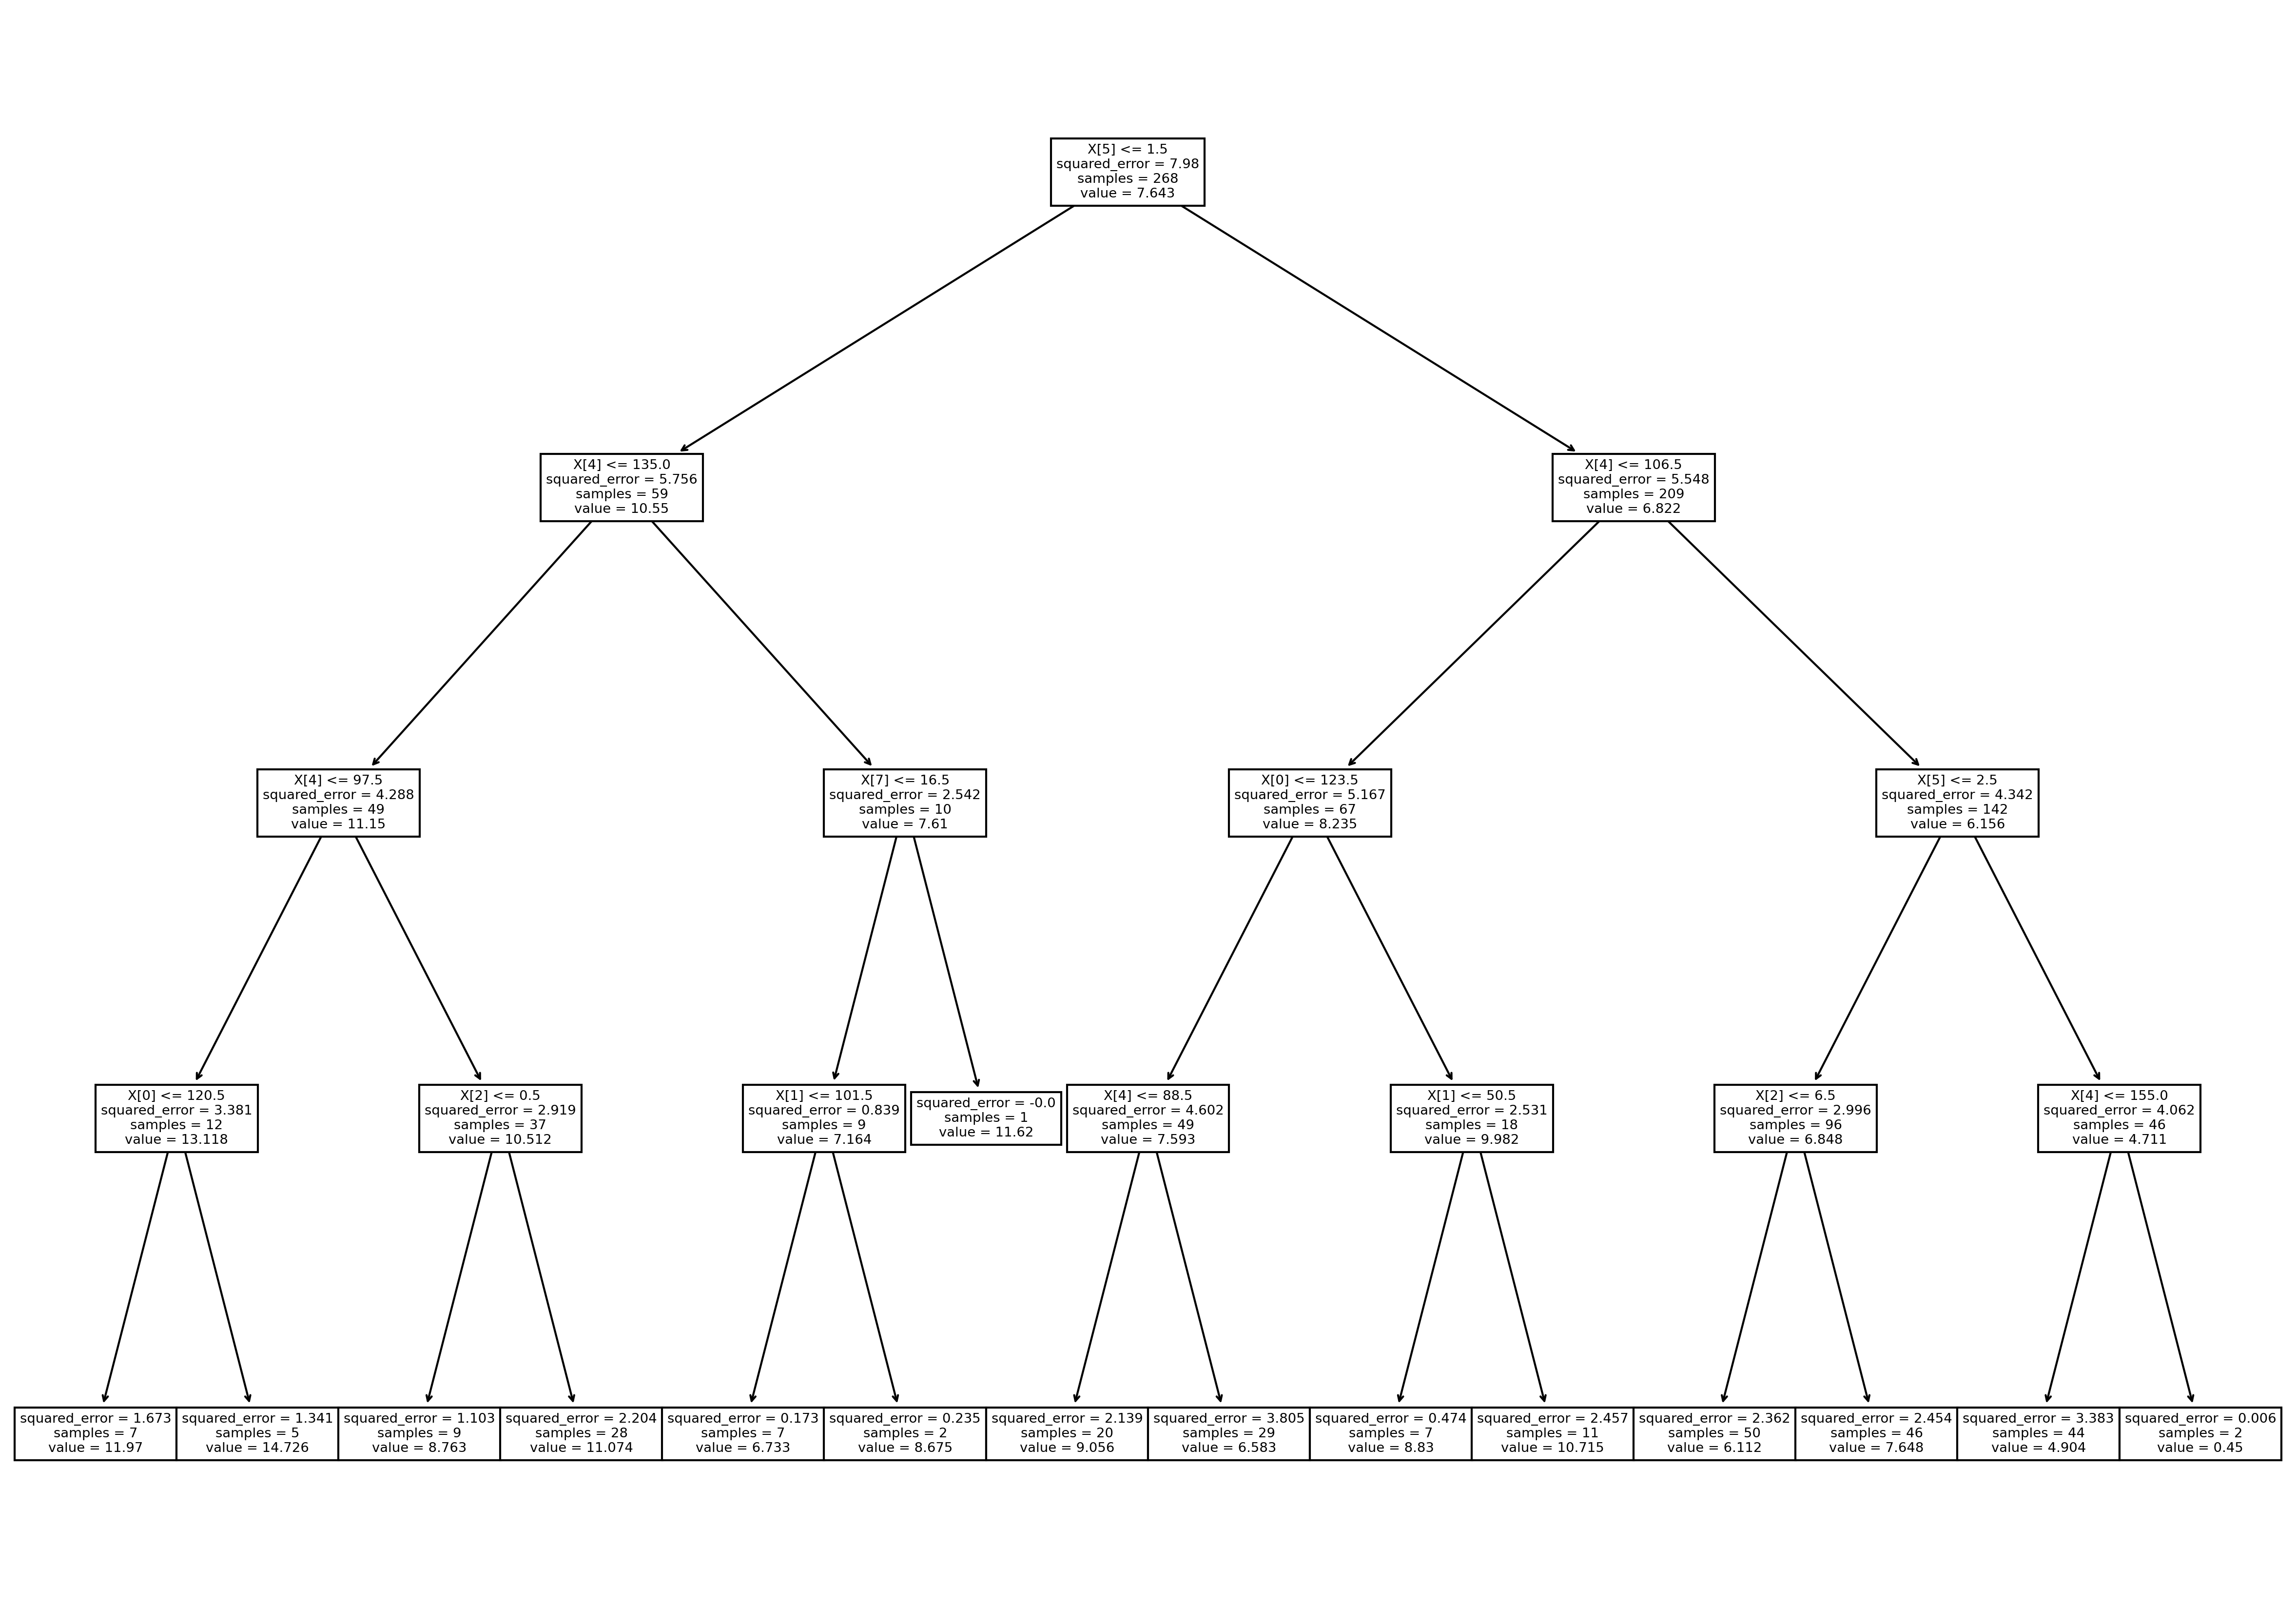

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14),dpi = 300)
plot_tree(model_reg)
plt.show()

                             Inference

From the above trees we are getting an idea about features that causes high sales are 'Shelvloc','Price', 'Population','Education','Comprice', 'Income','Advertising','Age'. 